## Control Volume

A control volume is one the core data containers of PDSim.  It primarily contains a state class (for the thermodynamic properties) and a function that is used to obtain the volume and derivative of the volume for the control volume.  

In [39]:
## COMMON IMPORTS ##
from __future__ import division, print_function
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

In [40]:
# Imports for this example
from PDSim.core import ControlVolume
from CoolProp.CoolProp import State

In [41]:
# Create a State instance
state = State('R410A', dict(T=300, P=101))

# The function that will return the volume and derivative of volume
def volume_function(theta):
    """
    Sinusoidal volume profile (recip-like).
    """
    Vdead = 4e-6 # m^3
    Vdisp = 20e-6 # m^3
    V = Vdead + Vdisp/2*(1-np.cos(theta))
    dVdtheta = Vdisp/2*np.sin(theta)
    return V, dVdtheta

# Now we create a ControlVolume instance
CV = ControlVolume('key1', volume_function, state)

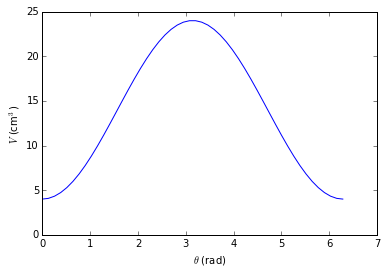

In [42]:
# Now we use the ControlVolume to plot the volume as a function of crank angle
theta = np.linspace(0, 2*np.pi)
V, dV = CV.V_dV(theta)
plt.plot(theta, V*1e6)
plt.xlabel(r'$\theta$ (rad)')
lb = plt.ylabel(r'$V$ (cm$^3$)')

In [43]:
# We can then query some properties of the ControlVolume's State class
print('T: ', CV.State.T,'K')
print('p: ', CV.State.p,'kPa')
print('rho: ', CV.State.rho,'kg/m^3')
# etc...

T:  300.0 K
p:  101.0 kPa
rho:  2.97716248743 kg/m^3
